In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns





## Data Acquisition

    The dataset can be downladed from : https://www.kaggle.com/datasets/khusheekapoor/coursera-courses-dataset-2021/data


In [2]:
df = pd.read_csv('Coursera.csv')
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## Basic EDA

In [3]:
df.shape

(3522, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [5]:
df.isnull().sum()
#no value is missing

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [6]:
df['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: count, dtype: int64

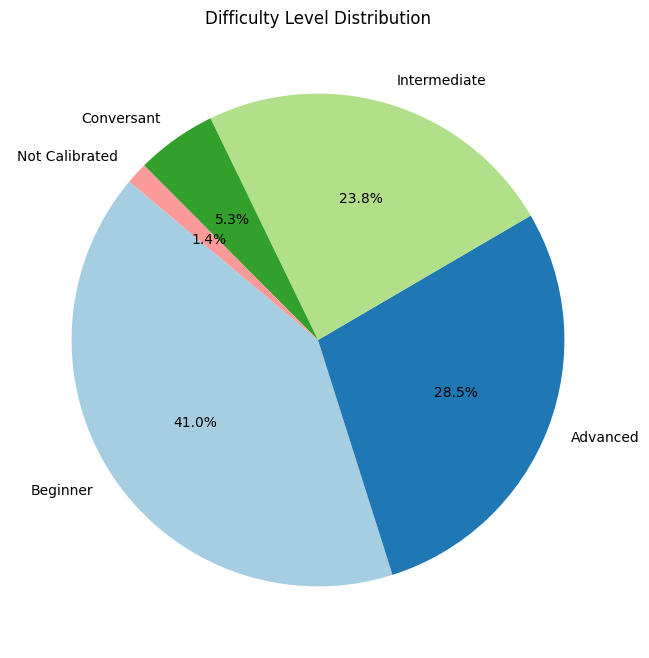

In [7]:
# Visualization for difficulty level

difficulty_counts = df['Difficulty Level'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Difficulty Level Distribution')
plt.show()

In [8]:
df['Course Rating'].value_counts()

Course Rating
4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: count, dtype: int64

In [9]:
df = df[df['Course Rating'] != 'Not Calibrated']

df['Course Rating'] = df['Course Rating'].astype(float)



<ipython-input-9-66e4352d4a2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Course Rating'] = df['Course Rating'].astype(float)


<ipython-input-10-d2f00773fc9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Course Rating',palette='plasma')


Text(0.5, 1.0, 'Count of course types\n')

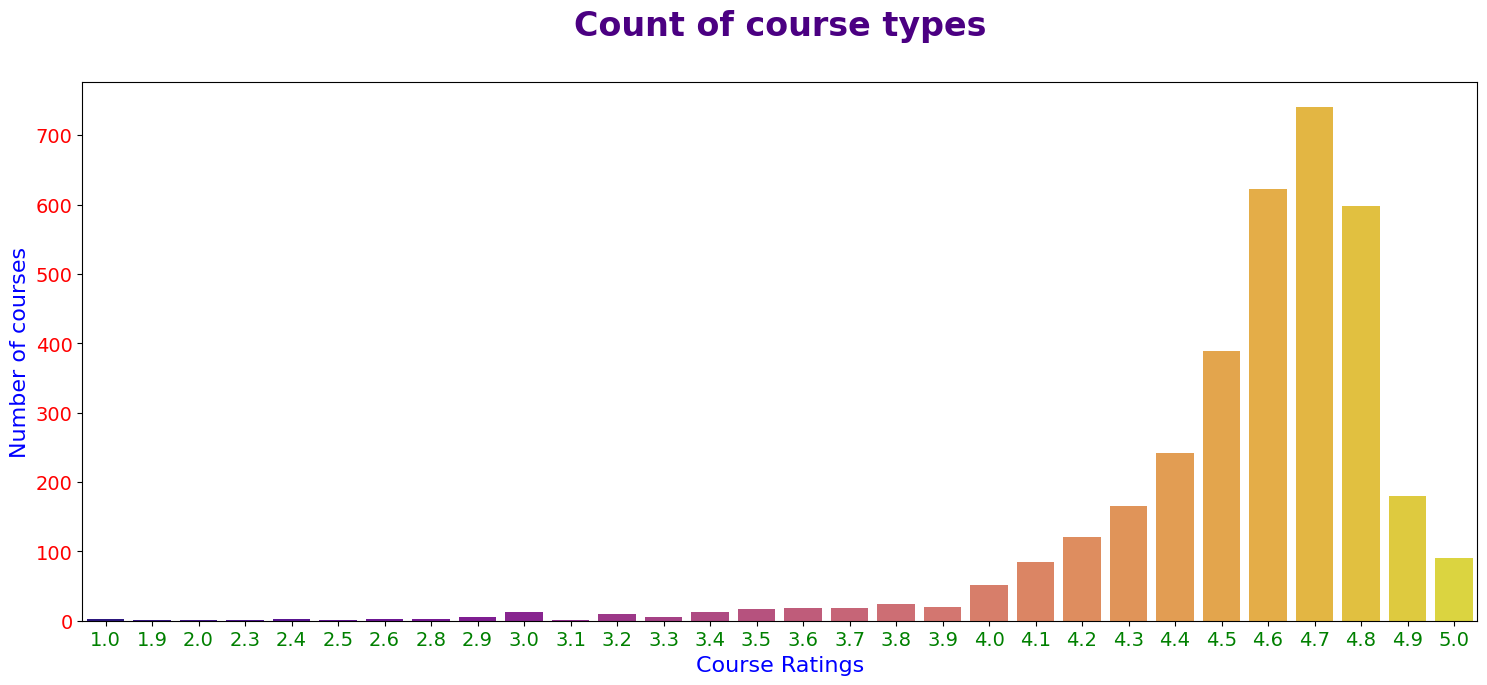

In [10]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='Course Rating',palette='plasma')
plt.xlabel('Course Ratings',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of course types\n",fontsize=24,fontweight='bold',color='indigo')

In [11]:
df = df[df['Course Rating'] > 4.0]

In [12]:
df['University'].value_counts()

University
Coursera Project Network                      494
University of Illinois at Urbana-Champaign    127
Johns Hopkins University                       97
University of Michigan                         96
University of Colorado Boulder                 86
                                             ... 
ConsenSys Academy                               1
Brightline Initiative                           1
H2O                                             1
Xi'an Jiaotong University                       1
The World Bank Group                            1
Name: count, Length: 180, dtype: int64

## Data Cleaning

In [13]:
# We can drop those columns that are not important for our model and for a better analytics result

df = df.drop(columns= 'Course URL')
df = df.drop(columns= 'University')
df.head()

,Course Name,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## Pre- Processing using NLP

In [14]:
df.head()

,Course Name,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


**Tags Column**

In [15]:
#Tags column
df['tags'] = df['Course Name'] + df['Difficulty Level'] + df['Course Description'] + df['Skills']

In [16]:
df.head(5)

,Course Name,Difficulty Level,Course Rating,Course Description,Skills,tags
0,Write A Feature Length Screenplay For Film Or ...,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy: Business Model Canvas Analy...,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business Strategy: Business Model Canvas Analy...
2,Silicon Thin Film Solar Cells,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Silicon Thin Film Solar CellsAdvancedThis cour...
3,Finance for Managers,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Finance for ManagersIntermediateWhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Retrieve Data using Single-Table SQL QueriesBe...


In [17]:
# Convert 'tags' columns to lowercase
df['tags'] = df['tags'].str.lower()


In [18]:
# Removing Punctuations
def remove_punctuation(text):
    punctuation_chars = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    return ''.join(char for char in text if char not in punctuation_chars)


df['tags'] = df['tags'].apply(remove_punctuation)




In [19]:
df['tags']

0       write a feature length screenplay for film or ...
1       business strategy business model canvas analys...
2       silicon thin film solar cellsadvancedthis cour...
3       finance for managersintermediatewhen it comes ...
4       retrieve data using singletable sql queriesbeg...
                              ...                        
3517    capstone retrieving processing and visualizing...
3518    patrick henry forgotten founderintermediate�gi...
3519    business intelligence and data analytics gener...
3520    rigid body dynamicsbeginnerthis course teaches...
3521    architecting with google kubernetes engine pro...
Name: tags, Length: 3233, dtype: object

In [20]:
df['tags'].iloc[1]

'business strategy business model canvas analysis with mirobeginnerby the end of this guided project you will be fluent in identifying and creating business model canvas solutions based on previous highlevel analyses and research data  this will enable you to identify and map the elements required for new products and services furthermore it is essential for generating positive results for your business venture this guided project is designed to engage and harness your visionary and exploratory abilities you will use proven models in strategy and product development with the miro platform to explore and analyse your business propositions   we will practice critically examining results from previous analysis and research results in deriving the values for each of the business model sectionsfinance  business plan  persona user experience  business model canvas  planning  business  project  product development  presentation  strategy business businessstrategy'

## New DataFrame for Model

In [21]:
new_df = df[['Course Name','tags']]

In [22]:
new_df.head(5)


,Course Name,tags
0,Write A Feature Length Screenplay For Film Or ...,write a feature length screenplay for film or ...
1,Business Strategy: Business Model Canvas Analy...,business strategy business model canvas analys...
2,Silicon Thin Film Solar Cells,silicon thin film solar cellsadvancedthis cour...
3,Finance for Managers,finance for managersintermediatewhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,retrieve data using singletable sql queriesbeg...


In [23]:
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)

<ipython-input-23-626a084aa76c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)


In [24]:
new_df.shape

(3233, 2)

In [25]:
new_df['tags'][1]

'business strategy business model canvas analysis with mirobeginnerby the end of this guided project you will be fluent in identifying and creating business model canvas solutions based on previous highlevel analyses and research data  this will enable you to identify and map the elements required for new products and services furthermore it is essential for generating positive results for your business venture this guided project is designed to engage and harness your visionary and exploratory abilities you will use proven models in strategy and product development with the miro platform to explore and analyse your business propositions   we will practice critically examining results from previous analysis and research results in deriving the values for each of the business model sectionsfinance  business plan  persona user experience  business model canvas  planning  business  project  product development  presentation  strategy business businessstrategy'

## Text Vectorization / Feature Extraction / Text Representation


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vectors = cv.fit_transform(new_df['tags']).toarray()
vectors.shape

(3233, 5000)

In [27]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
print(vectors[1])

[0 0 0 ... 0 0 0]


In [29]:
print(cv.vocabulary_)

{'write': 4973, 'feature': 1818, 'length': 2637, 'film': 1839, 'script': 4038, 'course': 1064, 'complete': 874, 'television': 4526, 'drama': 1423, 'comedy': 824, 'll': 2701, 'learn': 2621, 'break': 567, 'creative': 1082, 'process': 3539, 'components': 885, 'discover': 1349, 'structured': 4370, 'allows': 215, 'produce': 3545, 'polished': 3417, 'end': 1573, 'completing': 877, 'project': 3583, 'increase': 2301, 'confidence': 928, 'ideas': 2225, 'abilities': 50, 'feel': 1826, 'prepared': 3480, 'pitch': 3375, 'started': 4317, 'designed': 1256, 'tap': 4485, 'creativity': 1084, 'based': 456, 'active': 107, 'learning': 2625, 'actual': 113, 'takes': 4479, 'place': 3378, 'activities': 109, 'writing': 4976, 'doing': 1404, 'link': 2681, 'trailer': 4634, 'view': 4837, 'copy': 1041, 'paste': 3261, 'browser': 583, 'learner': 2623, 'review': 3919, 'love': 2734, 'approach': 286, 'professor': 3562, 'point': 3410, 'easy': 1462, 'follow': 1881, 'informative': 2343, 'definitely': 1203, 'recommend': 3756, '

In [30]:
feature_names = cv.get_feature_names_out().reshape(-1, 1)
print(feature_names[-40:-1])

[['workings']
 ['workload']
 ['workloads']
 ['workplace']
 ['works']
 ['workspace']
 ['workstation']
 ['world']
 ['worlds']
 ['worldwide']
 ['worry']
 ['worth']
 ['wrap']
 ['write']
 ['writer']
 ['writers']
 ['writing']
 ['written']
 ['wrong']
 ['xml']
 ['xp']
 ['xr']
 ['xray']
 ['yale']
 ['year']
 ['years']
 ['yellowbrick']
 ['yes']
 ['yield']
 ['yoga']
 ['york']
 ['youll']
 ['young']
 ['youre']
 ['youth']
 ['youtube']
 ['youve']
 ['zero']
 ['zoom']]


## Stemming


In [31]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#creating a helper function
#defining the stemming function
def stem(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

new_df['tags'] = new_df['tags'].apply(stem)
new_df['tags']

<ipython-input-31-31807ffd9543>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


0       write a featur length screenplay for film or t...
1       busi strategi busi model canva analysi with mi...
2       silicon thin film solar cellsadvancedthi cours...
3       financ for managersintermediatewhen it come to...
4       retriev data use singlet sql queriesbeginnerin...
                              ...                        
3517    capston retriev process and visual data with p...
3518    patrick henri forgotten founderintermediate�g ...
3519    busi intellig and data analyt gener insightsad...
3520    rigid bodi dynamicsbeginnerthi cours teach dyn...
3521    architect with googl kubernet engin production...
Name: tags, Length: 3233, dtype: object

In [32]:
feature_names = cv.get_feature_names_out().reshape(-1, 1)
print(feature_names[-40:-1])

[['workings']
 ['workload']
 ['workloads']
 ['workplace']
 ['works']
 ['workspace']
 ['workstation']
 ['world']
 ['worlds']
 ['worldwide']
 ['worry']
 ['worth']
 ['wrap']
 ['write']
 ['writer']
 ['writers']
 ['writing']
 ['written']
 ['wrong']
 ['xml']
 ['xp']
 ['xr']
 ['xray']
 ['yale']
 ['year']
 ['years']
 ['yellowbrick']
 ['yes']
 ['yield']
 ['yoga']
 ['york']
 ['youll']
 ['young']
 ['youre']
 ['youth']
 ['youtube']
 ['youve']
 ['zero']
 ['zoom']]


## Similarity Measure

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.04125846, 0.07543746, ..., 0.09804907, 0.05677014,
        0.08295939],
       [0.04125846, 1.        , 0.01187969, ..., 0.25090825, 0.00581101,
        0.03821286],
       [0.07543746, 0.01187969, 1.        , ..., 0.02470266, 0.03814072,
        0.01950754],
       ...,
       [0.09804907, 0.25090825, 0.02470266, ..., 1.        , 0.00805561,
        0.02354367],
       [0.05677014, 0.00581101, 0.03814072, ..., 0.00805561, 1.        ,
        0.01635807],
       [0.08295939, 0.03821286, 0.01950754, ..., 0.02354367, 0.01635807,
        1.        ]])

In [34]:
similarity.shape

(3233, 3233)

In [35]:
similarity[0]

array([1.        , 0.04125846, 0.07543746, ..., 0.09804907, 0.05677014,
       0.08295939])

In [36]:
def recommend(course):
    course_index = new_df[new_df['course_name'] == course].index[0] #fetching the index of particular course
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:10]

    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

In [37]:
recommend('Finance for Managers')

Introduction to Finance: The Basics
Fundamentals of financial and management accounting
The Language and Tools of Financial Analysis
Finance for Non-Financial Professionals
Financial Management Capstone
Management and financial accounting: Know your numbers 1
Finance for Non-Financial Managers
Operations Management: Analysis and Improvement Methods
Accounting and Finance for IT professionals


In [38]:
# import pickle

# pickle.dump(new_df,open('courses.pkl','wb'))
# pickle.dump(new_df.to_dict(),open('courses_dict.pkl','wb'))
# pickle.dump(new_df.to_dict(),open('similarity_dict.pkl','wb'))

In [39]:
# import pickle

# # Open the pickle file for reading
# with open('courses.pkl', 'rb') as file:
#     # Load the data from the pickle file
#     loaded_df = pickle.load(file)

# # Now you can use loaded_df, which contains the DataFrame object
# print(loaded_df.head())

# # Close the file (not strictly necessary due to using 'with' statement, but good practice)
# file.close()


In [40]:
import pickle

# Save the new_df DataFrame
with open('new_df.pkl', 'wb') as file:
    pickle.dump(new_df, file)

# Save the similarity matrix
with open('similarity.pkl', 'wb') as file:
    pickle.dump(similarity, file)

# Save the CountVectorizer object
with open('cv.pkl', 'wb') as file:
    pickle.dump(cv, file)